Episode  1, epsilon   0.98, batch size  200, ep return  1.2
Episode  2, epsilon   0.96, batch size  400, ep return  1.1
Episode  3, epsilon   0.94, batch size  600, ep return  0.9
Episode  4, epsilon   0.92, batch size  800, ep return  0.5
Episode  5, epsilon   0.90, batch size 1000, ep return  0.8
Episode  6, epsilon   0.88, batch size 1200, ep return  1.2
Episode  7, epsilon   0.86, batch size 1400, ep return  0.7
Episode  8, epsilon   0.84, batch size 1600, ep return  0.5
Episode  9, epsilon   0.82, batch size 1800, ep return  0.7
Episode 10, epsilon   0.80, batch size 2000, ep return  0.5
Episode 11, epsilon   0.78, batch size 2200, ep return  1.2
Episode 12, epsilon   0.76, batch size 2400, ep return  1.2
Episode 13, epsilon   0.74, batch size 2600, ep return  0.5
Episode 14, epsilon   0.72, batch size 2800, ep return  0.4
Episode 15, epsilon   0.71, batch size 3000, ep return  1.0
Episode 16, epsilon   0.69, batch size 3200, ep return  1.4
Episode 17, epsilon   0.67, batch size 3

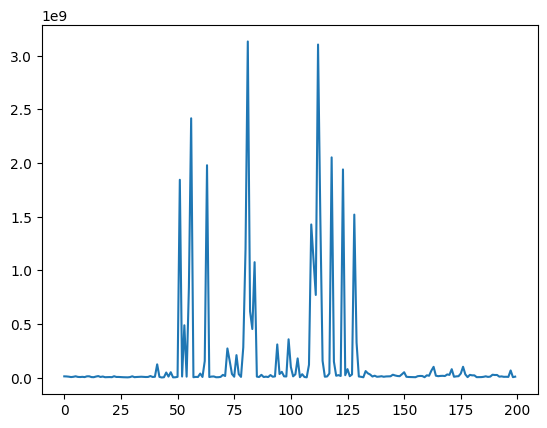

In [1]:
from train import ProjectAgent
from env_hiv import HIVPatient
from gymnasium.wrappers import TimeLimit
from train import ReplayBuffer
import torch.nn as nn
from train import HIVcnn
import numpy as np
import torch
from evaluate import evaluate_HIV
import matplotlib.pyplot as plt

agent = ProjectAgent()
env = TimeLimit(
    env=HIVPatient(domain_randomization=True), max_episode_steps=200
)
ep_return = agent.train(env, 200)
agent.save("model-HIV.pth")
plt.plot(ep_return)

In [2]:
x = 10
print(", ep return ", '{:4.1f}'.format(x*(0.0000001)))

, ep return   0.0


Episode  1, epsilon   0.98, batch size 86640, ep return  1.1
Episode  2, epsilon   0.96, batch size 86840, ep return  1.5
Episode  3, epsilon   0.94, batch size 87040, ep return  0.8
Episode  4, epsilon   0.92, batch size 87240, ep return  0.8
Episode  5, epsilon   0.90, batch size 87440, ep return  0.8
Episode  6, epsilon   0.88, batch size 87640, ep return  1.0
Episode  7, epsilon   0.86, batch size 87840, ep return  0.9
Episode  8, epsilon   0.84, batch size 88040, ep return  0.9
Episode  9, epsilon   0.82, batch size 88240, ep return  1.0
Episode 10, epsilon   0.80, batch size 88440, ep return  0.7
Episode 11, epsilon   0.78, batch size 88640, ep return  0.7
Episode 12, epsilon   0.76, batch size 88840, ep return  0.3
Episode 13, epsilon   0.74, batch size 89040, ep return  0.9
Episode 14, epsilon   0.72, batch size 89240, ep return  0.6
Episode 15, epsilon   0.71, batch size 89440, ep return  0.7
Episode 16, epsilon   0.69, batch size 89640, ep return  0.8
Episode 17, epsilon   0.

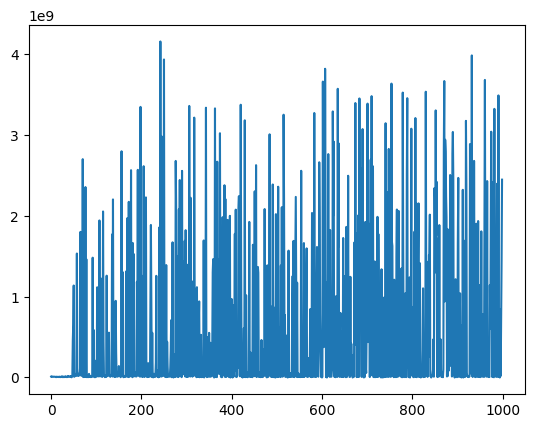

In [5]:
env = TimeLimit(
    env=HIVPatient(domain_randomization=True), max_episode_steps=200
)
ep_return = agent.train(env,1000)
agent.save("model-HIV.pth")
plt.plot(ep_return)

Episode  1, epsilon   0.98, batch size 366640, ep return  1.1
Episode  2, epsilon   0.96, batch size 366840, ep return  0.7
Episode  3, epsilon   0.94, batch size 367040, ep return  0.6
Episode  4, epsilon   0.92, batch size 367240, ep return  0.6
Episode  5, epsilon   0.90, batch size 367440, ep return  0.6
Episode  6, epsilon   0.88, batch size 367640, ep return  0.6
Episode  7, epsilon   0.86, batch size 367840, ep return  1.2
Episode  8, epsilon   0.84, batch size 368040, ep return  0.7
Episode  9, epsilon   0.82, batch size 368240, ep return  0.6
Episode 10, epsilon   0.80, batch size 368440, ep return  0.6
Episode 11, epsilon   0.78, batch size 368640, ep return  0.8
Episode 12, epsilon   0.76, batch size 368840, ep return  0.8
Episode 13, epsilon   0.74, batch size 369040, ep return  0.5
Episode 14, epsilon   0.72, batch size 369240, ep return  0.6
Episode 15, epsilon   0.71, batch size 369440, ep return  0.5
Episode 16, epsilon   0.69, batch size 369640, ep return  0.8
Episode 

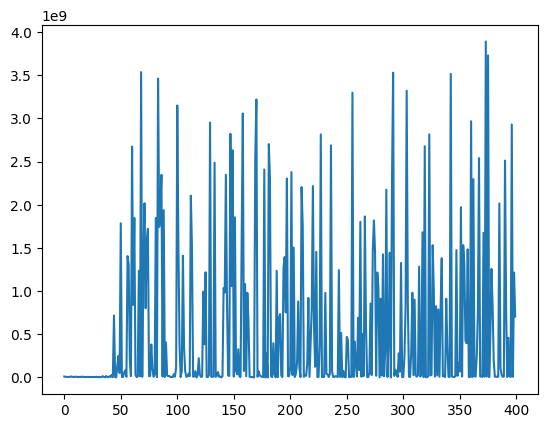

In [9]:
env = TimeLimit(
    env=HIVPatient(domain_randomization=True), max_episode_steps=200
)
ep_return = agent.train(env,400)
agent.save("model-HIV.pth")
plt.plot(ep_return)

In [2]:
obs, info = env.reset()
done = False
truncated = False
episode_reward = 0
while not done and not truncated:
    action = agent.act(obs)
    print(action, end=" ")
    obs, reward, done, truncated, _ = env.step(action)
    episode_reward += reward
print(episode_reward)

2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 0 3 2 3 3 3 3 3 3 2 3 2 3 3 3 3 3 2 3 3 3 3 3 3 0 0 2 3 3 3 3 3 3 3 2 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 2 0 3 3 3 0 3 3 3 3 3 3 0 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 2 3 3 0 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 13685984.322876722


In [10]:
from evaluate import evaluate_HIV, evaluate_HIV_population

score_agent: float = evaluate_HIV(agent=agent, nb_episode=5)
score_agent_dr: float = evaluate_HIV_population(agent=agent, nb_episode=20)
print(f"Score agent: {score_agent*1e-7}")
print(f"Score agent with domain randomization: {score_agent_dr*1e-7}")
with open(file="score.txt", mode="w") as f:
            f.write(f"{score_agent}\n{score_agent_dr}")

Score agent: 0.6787976815833554
Score agent with domain randomization: 132.3685684187915


In [8]:
from grading import test_expected_result_one_env_3432807, test_expected_result_one_env_1e8, test_expected_result_one_env_1e9, test_expected_result_one_env_1e10, test_expected_result_one_env_2e10, test_expected_result_one_env_5e10
from grading import test_expected_result_dr_env_1e10, test_expected_result_dr_env_2e10, test_expected_result_dr_env_5e10

test_expected_result_one_env_3432807()
print("1", end=" ")
test_expected_result_one_env_1e8()
print("2", end=" ")
test_expected_result_one_env_1e9()
print("3", end=" ")
test_expected_result_one_env_1e10()
print("4", end=" ")
test_expected_result_one_env_2e10()
print("5", end=" ")
test_expected_result_one_env_5e10()
print("6", end=" ")
test_expected_result_dr_env_1e10()
print("7", end=" ")
test_expected_result_dr_env_2e10()
print("8", end=" ")
test_expected_result_dr_env_5e10()
print("9", end=" ")

1 

AssertionError: 